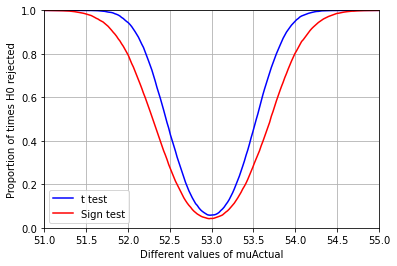

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy import stats


n = 20
N = 10**4
muRange = np.linspace(51,55,200)

mu0 = 53.0
powerT = []
powerU = []

for muActual in muRange:
    dist = stats.norm(muActual, 1.2)
    rejectT, rejectU = 0, 0
    np.random.seed(1)
    
    for _ in range(1,N):
        data = dist.rvs(20)
        xBar, stdDev = np.mean(data), np.std(data)

        tStatT = (xBar - mu0)/(stdDev/np.sqrt(n))
        pValT = 2*(1-stats.t.cdf(abs(tStatT),n-1))
        xPositive = sum( j > mu0 for j in data)
        uStat = max(xPositive, n-xPositive)
        pValSign = 2*(stats.binom.pmf(uStat,n,0.5))
        rejectT += pValT < 0.05
        rejectU += pValSign < 0.05
       
    powerT.append(rejectT/N)
    powerU.append(rejectU/N)

plt.plot(muRange, powerT, c='blue', label="t test")
plt.plot(muRange, powerU, c='red', label="Sign test")
plt.xlabel("Different values of muActual")
plt.ylabel("Proportion of times H0 rejected")
plt.xlim((51,55))
plt.ylim((0,1))
plt.legend()
plt.grid(b=None, which='major', axis='both')
plt.show()